<a href="https://colab.research.google.com/github/davidgoins236/public/blob/main/Coursera_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Visualization with Python


##Week 1 Matplotlib

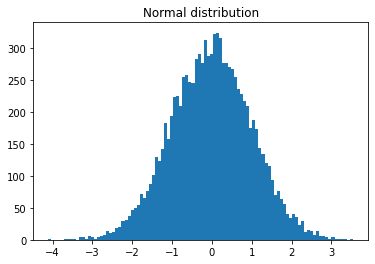

In [ ]:
#build a histogram of 1000 random #s
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(10000)
plt.hist(x,100)
plt.title(r'Normal distribution')
plt.savefig('matplotlib.png')
plt.show()

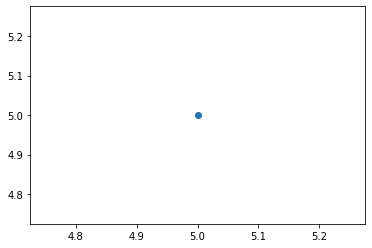

In [ ]:
plt.plot(5,5,'o')

In [ ]:
import pandas as pd
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
#python equivalent of colnames()
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [ ]:
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
#rename some columns
df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [ ]:
#add a total column by summing across axis 1
#apparently it's smart enough to disregard the non numeric columns
df_can['Total']=df_can.sum(axis= 1)
df_can.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
#check for nulls
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [ ]:
#summary()
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [ ]:
#subsetting columns
df_can[['Country',1980]]

,Country,1980
0,Afghanistan,16
1,Albania,1
2,Algeria,80
3,American Samoa,0
4,Andorra,0
...,...,...
190,Viet Nam,1191
191,Western Sahara,0
192,Yemen,1
193,Zambia,11


In [ ]:
#filter rows using the index
#start by making country the index for this df
df_can.set_index('Country', inplace=True)

In [ ]:
#lets filter on japan
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [ ]:
#Japan for 2013
df_can.loc['Japan',2013]

982

In [ ]:
df_can['Continent']=='Asia'

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool

In [ ]:
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [ ]:
# useful for plotting later on
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [ ]:
haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

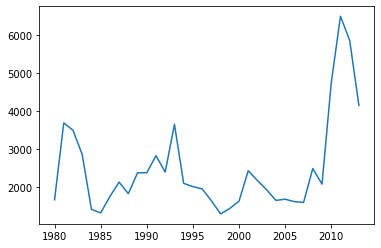

In [ ]:
haiti.plot()

Text(0.5, 0, 'this is the x axis')

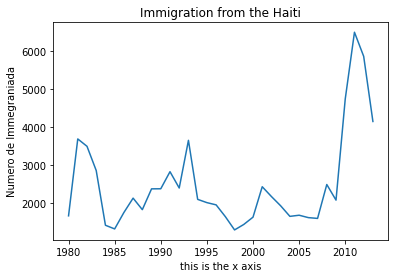

In [ ]:
haiti.index = haiti.index.map(int) # change index back to int
haiti.plot(kind='line')
plt.title('Immigration from the Haiti')
plt.ylabel('Numero de Immegraniada')
plt.xlabel('this is the x axis')

Text(2000, 6000, '2010: this a damn disaster')

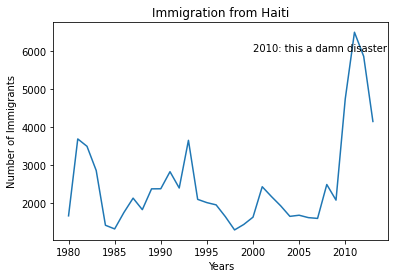

In [ ]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010: this a damn disaster') # see note below

### Data Vis Week2

Text(0, 0.5, 'vert axis')

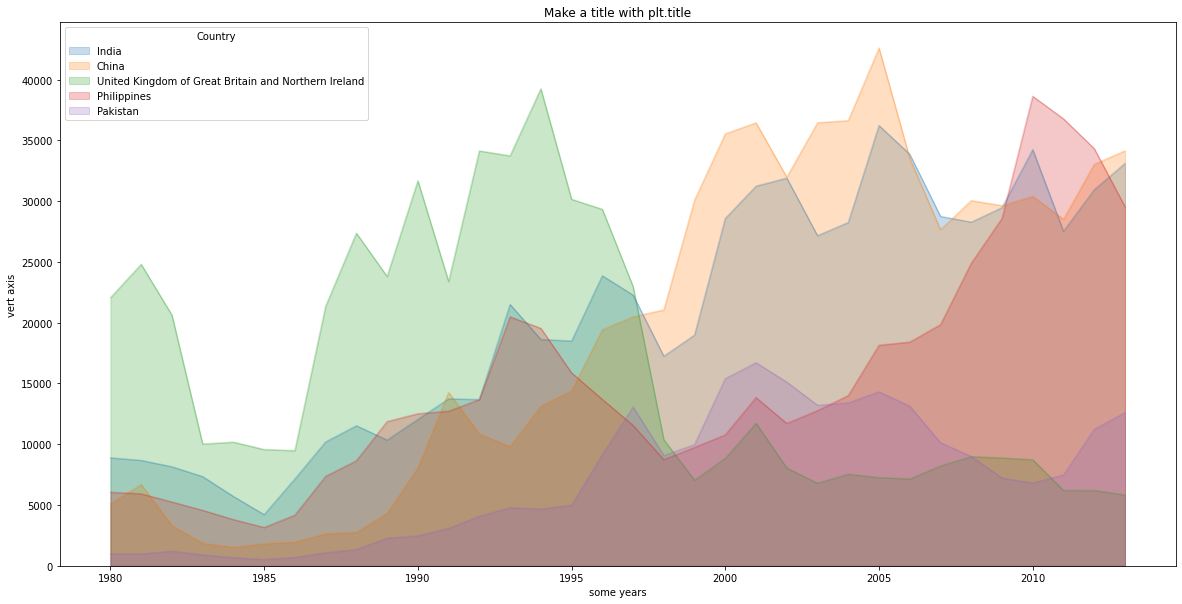

In [ ]:
#Area Plot
df_can.sort_values(['Total'],ascending = False, inplace = True)
df_can.head(5)
df_top5=df_can.head(5)
df_top5=df_top5[years].transpose()

df_top5.plot(kind='area',
             stacked = False,
             alpha=.25,
             figsize = (20,10))
plt.title('Make a title with plt.title')
plt.xlabel('some years')
plt.ylabel('vert axis')

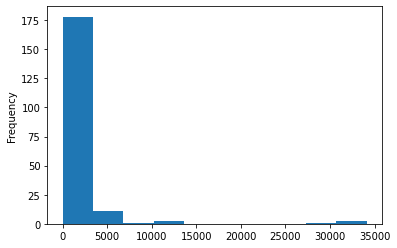

In [ ]:
#histograms
df_can['2013'].plot(kind = 'hist')

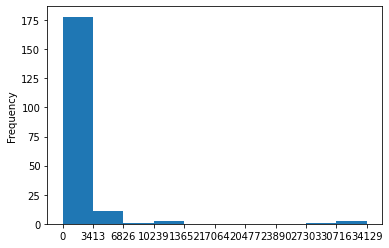

In [ ]:
#alternative with numpy (allows us to align the x axis tics)
#figure out hte bin edges with numpy
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind = 'hist',xticks = bin_edges)

Text(0.5, 0, 'some years')

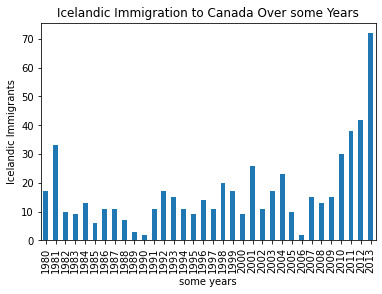

In [ ]:
#bar chart
#create a bar chart for the immigration from iceland
df_iceland = df_can.loc['Iceland',years]
df_iceland.plot(kind ='bar')

plt.title('Icelandic Immigration to Canada Over some Years')
plt.ylabel('Icelandic Immigrants')
plt.xlabel('some years')

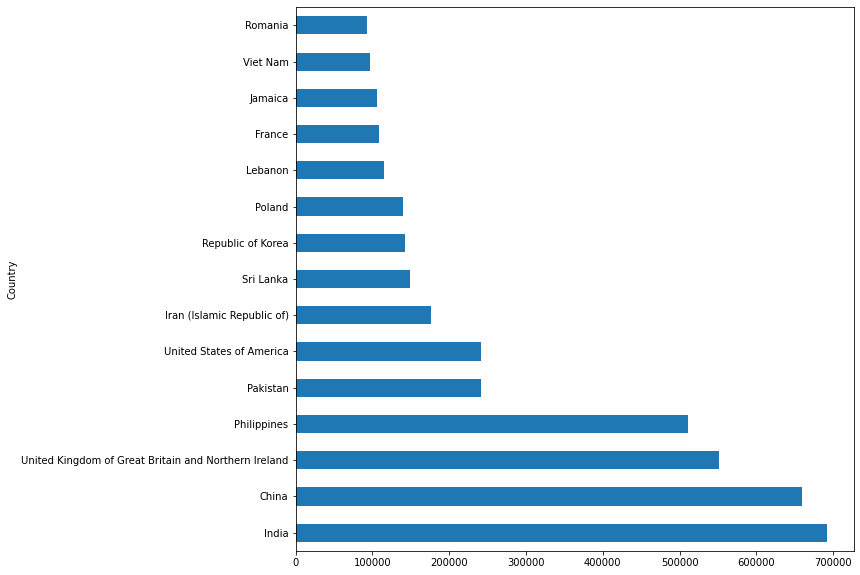

In [ ]:
#horizontal bar chart
t10 = df_can.sort_values(['Total'],ascending = False).head(15)

t10['Total'].plot(kind = 'barh',
                  figsize = (10,10)
         )

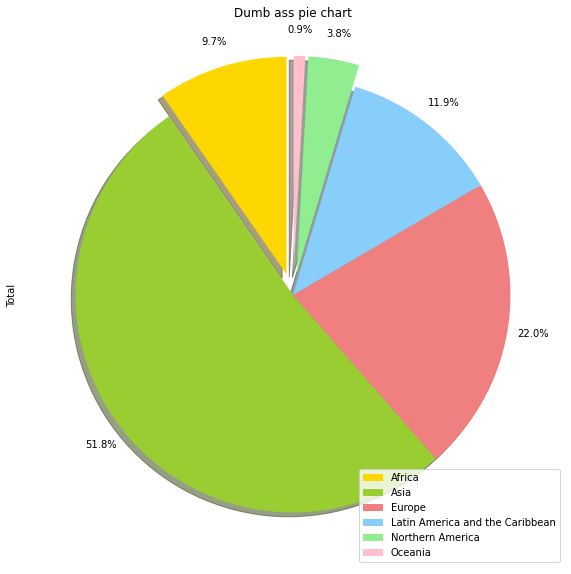

In [ ]:
#Pizza Charts
continent = df_can.groupby('Continent',axis = 0).sum()
continent.head()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'] #specify the colors
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.


continent['Total'].plot(kind = 'pie',
                        figsize = (10,10),
                        autopct = '%1.1f%%', #add percentages automatically
                        startangle = 90, #start at the 12 o'clock position
                        shadow = True,
                        labels = None,
                        pctdistance = 1.12, #move the labels away from the center of the pie
                        colors = colors_list,
                        explode = explode_list
                        )
plt.title('Dumb ass pie chart')
plt.legend(labels = continent.index, loc = 'lower right')

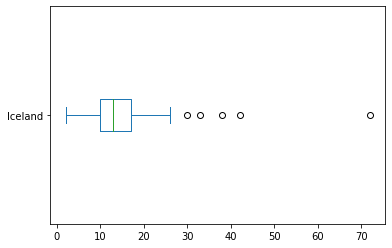

In [ ]:
#boxplot
df_iceland.plot(kind ='box',
                vert = False)

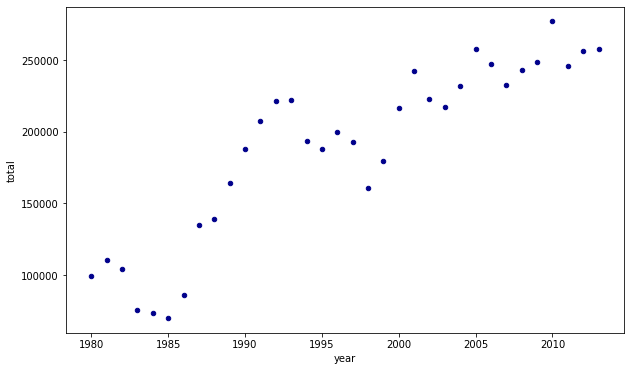

In [ ]:
#scatter plot
#wrangle the data

df_tot=pd.DataFrame(df_can[years].sum(axis=0))
df_tot.head()

#change years to int
df_tot.index = map(int,df_tot.index)
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns = ['year','total']

df_tot.head()

df_tot.plot(kind='scatter',
            x = 'year',
            y = 'total',
            figsize = (10,6),
            color='darkblue')

In [ ]:
# add the line of fit
x = df_tot['year']
y = df_tot['total']

fit = np.polyfit(x,y,deg= 1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

Text(2000, 150000, 'y=5567 * Year + -10926195')

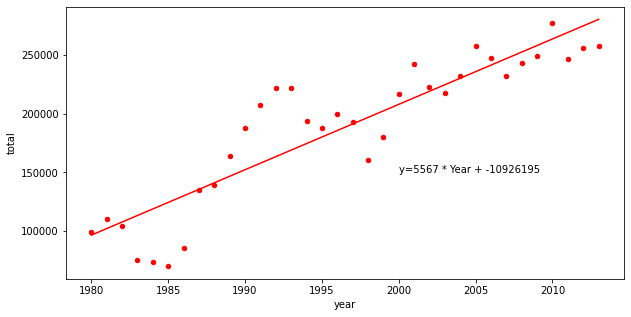

In [ ]:
df_tot.plot(kind = 'scatter',
            x= 'year',
            y='total',
            figsize = (10,5),
            color = 'red')

plt.plot(x ,fit[0]* x + fit[1],color = 'red')
plt.annotate('y={0:.0f} * Year + {1:.0f}'.format (fit[0],fit[1]),xy = (2000,150000))

In [ ]:
#Make shit look like ggplot
%matplotlib inline

import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=500 align="center">


Text(0.5, 1.0, 'Line Trend Styles')

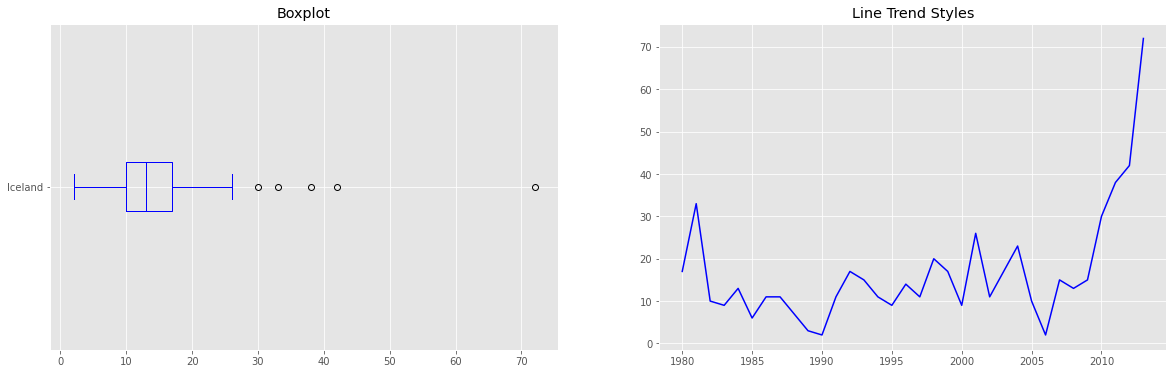

In [ ]:
#sub plots
fig=plt.figure()

ax0 = fig.add_subplot(1,2,1) #add subpot 1 ( 1row, 2 col, first plot)
ax1 = fig.add_subplot(1,2,2) #1 row, 2 col ,2nd plot

#subplot 1: boxplot
df_iceland.plot(kind = 'box', color = 'blue', vert = False, figsize = (20,6),ax = ax0)
ax0.set_title('Boxplot')

#plot 2 = line plot
df_iceland.plot(kind ='line',color = 'blue',ax = ax1)
ax1.set_title('Line Trend Styles')

### Week Three 
- Waffle Charts
- Word Clouds
- Seaborn
- Geospatial Data

### Waffle


In [ ]:
# Waffle Chart
import matplotlib.patches as mpatches # needed for waffle charts
# filter down to 3 countries

df_scan = df_can.loc[['Denmark','Sweden','Norway']]

#step 1 calculate the proportions relative to the whole
total_values = df_scan['Total'].sum()
cat_props = df_scan['Total']/total_values
cat_props


Country
Denmark    0.322557
Sweden     0.485034
Norway     0.192409
Name: Total, dtype: float64

<Figure size 432x288 with 0 Axes>

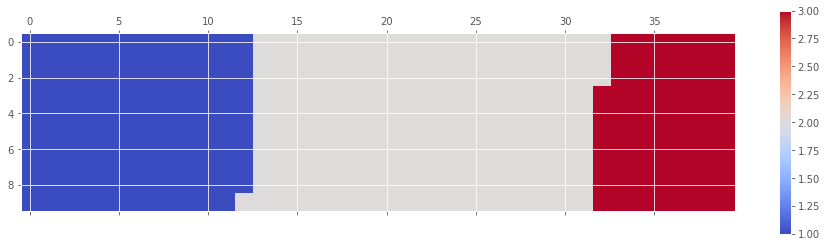

In [ ]:
#Waffle continued
#step 2 compute the number of tiles per section
width = 40
height = 10

total_num_tiles = width * height

#step 3 calculate n tiles per group
tiles_per_group = (cat_props * total_num_tiles).round().astype(int)

#step 4 initialize teh chart as an empty matrix
waffle_chart = np.zeros((height,width),dtype = np.uint)

#define indices to loop through the waffle chart
cat_index = 0
tile_index = 0

#populate the waffle
for col in range(width):
  for row in range(height):
    tile_index += 1

    #if the num of tiles populated for the current cat is equal to the its tile count
    if tile_index > sum(tiles_per_group[0:cat_index]):
      #...proceed to the next cat
      cat_index += 1
    #set teh class value to int, whcih increases with class
    waffle_chart[row, col] = cat_index

waffle_chart

#step 5 map the waffle

#initiate an empty figure
fig = plt.figure()

#use matshow to display the chart
colormap = plt.cm.coolwarm

plt.matshow(waffle_chart,cmap = colormap)
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

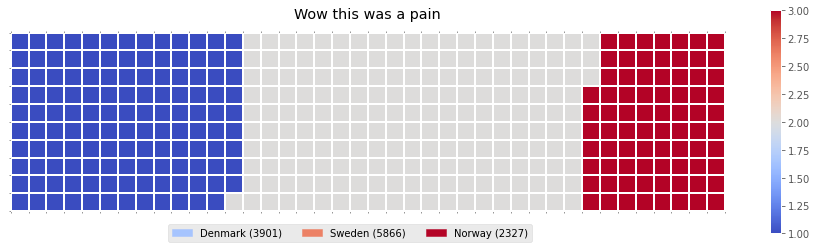

In [ ]:
#step 6: make the chart look better
#initiate a new fig
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

#get axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1),minor = True)
ax.set_yticks(np.arange(-.5, (height),1),minor = True)

#add gridlines based on minor tics
ax.grid(which = 'minor', color = 'w',linestyle = '-',linewidth = 2)

plt.xticks([])
plt.yticks([])
plt.title('Wow this was a pain')

#create a legend
values_cumsum = np.cumsum(df_scan['Total'])
total_values = values_cumsum[len(values_cumsum)-1]

legend_handles=[]
for i, category in enumerate(df_scan.index.values):
  label_str = category +' ('+str(df_scan['Total'][i]) + ')'
  color_val = colormap(float(values_cumsum[i])/total_values)
  legend_handles.append(mpatches.Patch(color = color_val, label= label_str))

#add legend to the chart
plt.legend(handles = legend_handles,
           loc = 'lower center',
           ncol = len(df_scan.index.values),
           bbox_to_anchor=(0., -0.2,0.95, .1),
           )

plt.show()

In [ ]:
#create waffle chart function
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Total number of tiles is 400
Denmark: 129
Sweden: 194
Norway: 77


<Figure size 432x288 with 0 Axes>

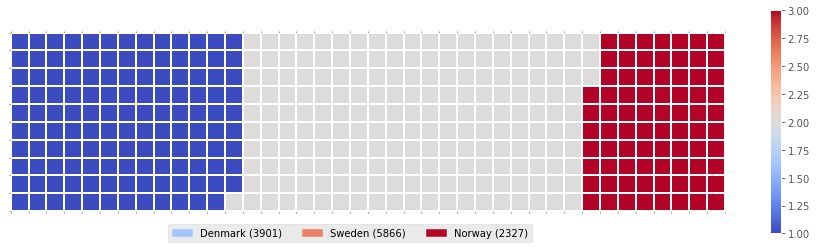

In [ ]:
# now test our waffle function
# creat the parms
width = 40 # width of chart
height = 10 # height of chart

categories = df_scan.index.values # categories
values = df_scan['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

#call the func
create_waffle_chart(categories, values, height, width, colormap)

### Word Cloud

In [ ]:
#pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Get our text data
import urllib

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

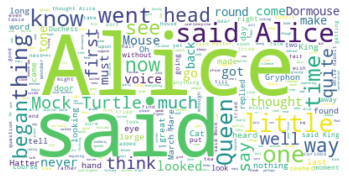

In [ ]:
#create a set of stopwords
stopwords = set(STOPWORDS)
#initiate a word cloud object
alice_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords =stopwords
)

#generate our cloud
alice_wc.generate(alice_novel)

#display

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

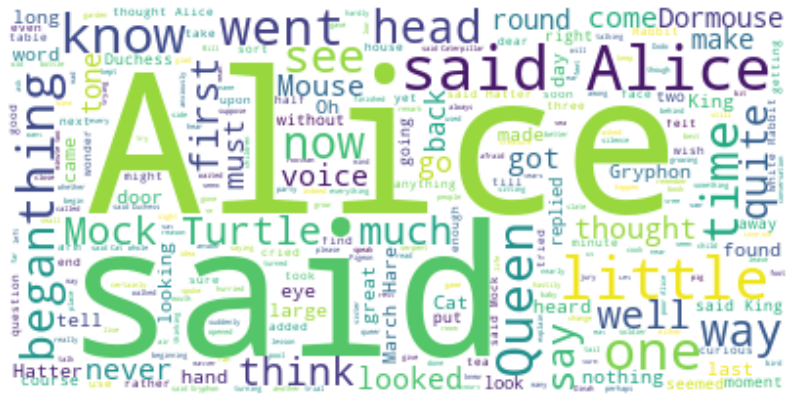

In [ ]:
#lets resize the cloud

fig = plt.figure(figsize = (14,18))

plt.imshow(alice_wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

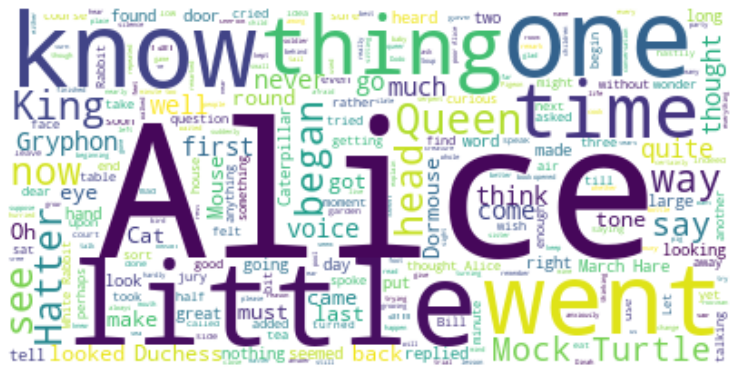

In [ ]:
#lets remove the word said by adding it to our stopwords
stopwords.add('said')
#now regen the wc

alice_wc.generate(alice_novel)

fig = plt.figure(figsize = (13,19))

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#superimpose the wc on a mask shape
from PIL import Image
#save mask to alice_mask (downloaded)
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

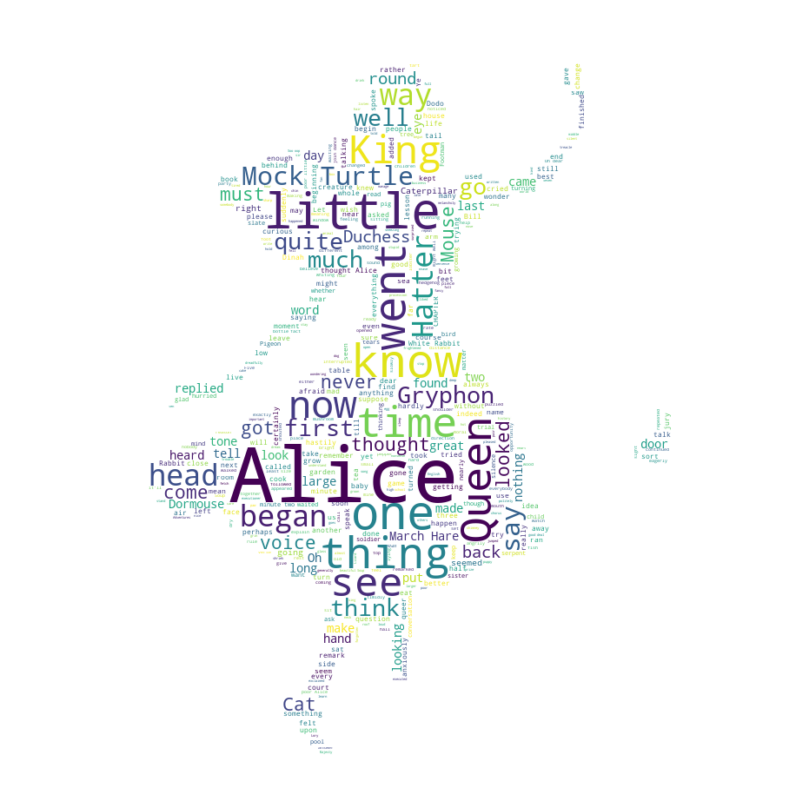

In [ ]:
#init the word cloude
alice_wc = WordCloud(background_color = 'white',
                     max_words = 2000,
                     mask = alice_mask,
                     stopwords=stopwords)

#gen the cloud
alice_wc.generate(alice_novel)

#display
fig=plt.figure(figsize = (14,18))

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#create a wordcloud from a dataframe
total_immigration = df_can['Total'].sum()

#using the countries with single word names, duplicate the words based on teh number of immigrants
max_words = 90
word_string=''

for country in df_can.index.values:
  #check if the country names is single-wrd
  if country.count(" ") == 0:
    repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
    word_string = word_string+ ((country + ' ')* repeat_num_times)

#display the generated text
word_string

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

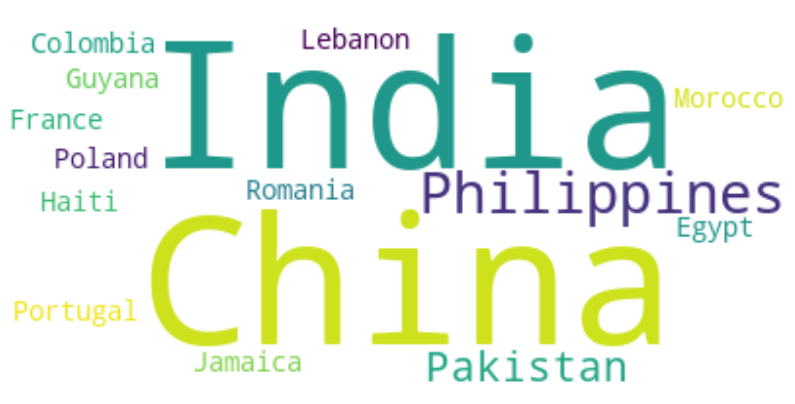

In [ ]:
#create the cloud
wordcloud = WordCloud(background_color = 'white').generate(word_string)

plt.figure(figsize=(14,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plots


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 to 2013')

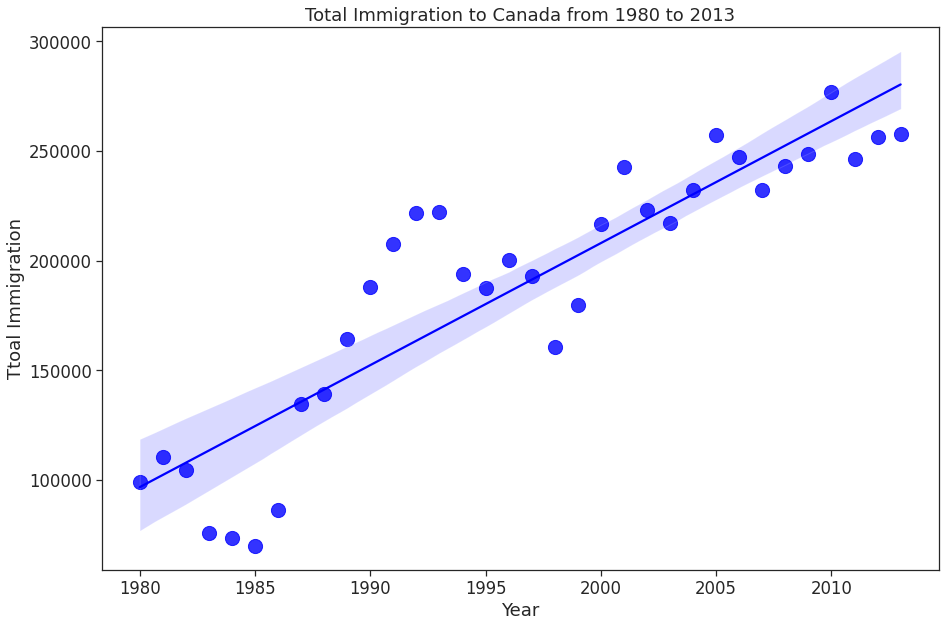

In [ ]:
#seaborn: it's better than mpl on its own
df_tot.head()
import seaborn as sns 
plt.figure(figsize = (15,10)) #increse the size
sns.set(font_scale = 1.5) #increase fontsize
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x = 'year',
                 y='total',
                 data = df_tot,
                 color = 'blue', 
                 marker = 'o',
                 scatter_kws={'s':200} # increase mark size
                 )
#set labs
ax.set(xlabel = 'Year',
       ylabel = 'Ttoal Immigration')
ax.set_title('Total Immigration to Canada from 1980 to 2013')

### Geospatial
- Folium
- Chorpleht Maps

In [ ]:
# Folium
import folium
world_map = folium.Map(
    #location = [56.130,-106.35],
    zoom_start=5,
    tiles = 'Stamen Toner'
)
world_map

In [ ]:
test_map = folium.Map(
    location = [40.4637,-3.7492],
    zoom_start = 6,
    tiles = 'Stamen Terrain'
    #tiles = 'Stamen Toner' 
)
test_map

In [ ]:
home_map = folium.Map(
    location = [38.253650,-85.692130],
    zoom_start = 19,
    #tiles = 'Stamen Terrain'
    #tiles = 'Stamen Toner' 
)

#add marks

#create a feature group
home = folium.map.FeatureGroup()

#style the feature group
home.add_child(
    folium.CircleMarker([38.253650,-85.692130],
                                 radius = 12,
                                 color = 'red',
                                 fill_color='red')
)

home_map.add_child(home)

#label it
folium.Marker([38.253650,-85.692130],
              popup='Nice Place').add_to(home_map)
home_map


In [ ]:
#sample exercise - maps with markers
df_incidents=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [ ]:
#limit the data to first 100 rows
df_incidents = df_incidents.iloc[0:100,:]

#set lat lon for san fran
lat = 37.77
lon = -122.42

#creat the sanfran map
sanfran_map = folium.Map(location = [lat,lon],
                         zoom_start = 12)
sanfran_map

In [ ]:
#now lets superimpose the crime data on the map
incidents = folium.map.FeatureGroup()

#Loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
  incidents.add_child(
      folium.CircleMarker(
          [lat,lng],
          radius = 5,
          color = 'red',
          fill = True,
          fill_color = 'blue',
          fill_opacity = .6
      )
  )
#add popul text
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat,lng, label in zip(latitudes,longitudes,labels):
  folium.Marker([lat,lng],
                popup = label).add_to(sanfran_map)

#add incidents thte mpa
sanfran_map.add_child(incidents)

In [ ]:
#alternately we can lose the pins and add the popup windows to the markers themselves, see below

# create map and display it
sanfran_map = folium.Map(location=[lat, lon], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

The other proper remedy is to group the markers into different clusters. Each cluster is then represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which you can then analyze separately.

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.


In [ ]:
from folium import plugins 

# reset our map
sanfran_map = folium.Map(location = [lat,lon],
                         zoom_start = 12)

#init mark cluster object
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# Loop through the df and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y,df_incidents.X,df_incidents.Category):
  folium.Marker(
      location = [lat,lng],
      icon = None,
      popup = label,
  ).add_to(incidents)


sanfran_map


###Choropleth Maps

In [ ]:
#Choropleth maps need the geometry of the location to work, must be downloaded as a GeoJSON
# download countries geojson file

import json
import urllib, json
#location of our GeoJSON
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
#Python 3 Version (moded from class notes)
with urllib.request.urlopen(URL) as url:
  world_geo = json.loads(url.read().decode())

#init our blank map
world_map = folium.Map(location=[0,0],
                       zoom_start = 2)

#add the country column back into the df column list
df_can['Country']=df_can.index

In [ ]:
#generate choropleth map using the totla immigration of each country to canad from 1980-2013
world_map.choropleth(
    geo_data = world_geo,
    data = df_can,
    columns = ['Country','Total'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity = .7,
    line_opacity = .2,
    legend_name = 'Immigration to Canada'
)
world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### Week4 Creating Dashboards with Plotly & Dash
- Dash from Plotly
- Panel
- Viola (turns jupyter notebooks into web apps)
- Streamlit (create web app)
- Bokeh
- ipywidgets (requires seperate server)
- matplotlib
- bowtie
- flask - build websites

Dashboarding Tools: https://pyviz.org/dashboarding/


### Plotly
- interactive open source library
- Java , R and Python
- Note Plotly Express is the more efficient version of plotly
### Resources
- Getting Started: https://plotly.com/python/getting-started/
- Examples: https://plotly.com/python/graph-objects/
- Express: https://plotly.com/python/plotly-express/
- API Reference: https://plotly.com/python-api-reference/
- Plotly Cheatsheet: https://images.plot.ly/plotly-documentation/images/plotly_js_cheat_sheet.pdf
- Open Source Datasets: https://developer.ibm.com/exchanges/data/


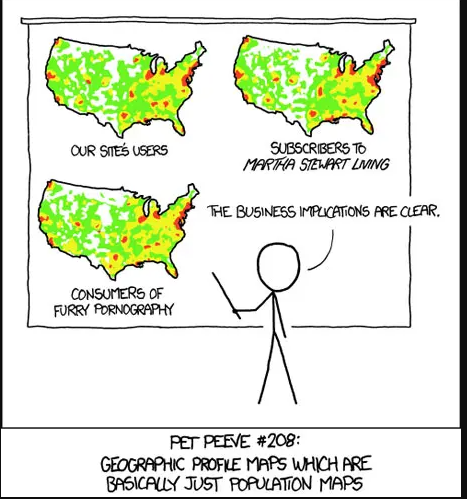

In [ ]:
#sample using plotly 
import plotly.graph_objects as go
import plotly.express as px
import numpy as np 

#generate some random data
np.random.seed(123)
x = np.arange(12)
y = np.random.randint(50,500,size =12)
#init the fig with a scatter type trace
fig = go.Figure(data = go.Scatter(x=x,y=y))
fig.update_layout(title='Simple Line Plot',xaxis_title = 'Month',yaxis_title = 'Sales')
fig.show()

In [ ]:
#sample using plotly express
fig = px.line(x = x,y=y,title = 'Efficient Line Chart', labels = dict(x = 'Month', y = 'Sales'))
fig.show()

In [ ]:
#get some data to dashboard with (airline data)

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'
airline_data = pd.read_csv(URL,
                           encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from pandas.core.common import random_state
#lets sample 500 random datapoints to cut down on processing time, note = random state = 42 ensures consistent results in future runs (like set seed)
data = airline_data.sample(n=500,random_state=42)

Idea: How departure time changes with respect to airport distance
use a scatter plot to investigate

In [ ]:
# first we create a figure using go.Figure and adding trace to it through go.scatte
fig = go.Figure(data= go.Scatter(x = data['Distance'],y=data['DepTime'], mode = 'markers', marker=dict(color = 'red')))

#udpate layout using update_Layout - adding title to the plot
fig.update_layout(title = 'Distance vs Departure Time', xaxis_title = 'Distance', yaxis_title = 'DepTime')

fig.show()

Idea: Extract average monthly arrival delay time and see how it changes over the year

In [ ]:
# Group the data by month and compute average over arrival delay time
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()


#Display the data
line_data
#Line chart using plotly (only difference is mode), again only cool thing about this is tool tips (syntax is heavy)
fig=go.Figure(data = go.Scatter(x = line_data['Month'],y = line_data['ArrDelay'],mode = 'lines'))
fig.show()

Idea Extract n flights from a specific airline that goes to a destination
- side note: this df has too many columns to view without changing the default max columns value

In [ ]:
bar_data = data.groupby(['DestState'])['Flights'].sum().reset_index()
#sidenote things
pd.set_option('display.max_columns',10)
list(data.columns)

bar_data = bar_data.sort_values(['Flights'],ascending = False)

fig = px.bar(bar_data, x = 'DestState',y = 'Flights', title = 'Total Flights by Destination State')
fig.show()

In [ ]:
#Bubble Chart
#create some data
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()

fig = px.scatter(bub_data, x = 'Reporting_Airline',
                 y='Flights',
                 size = 'Flights',
                 hover_name = 'Reporting_Airline',
                 title = 'Title',
                 size_max=69)
fig.show()

Historgram
Idea: Proportion of distance group by month (month indicated by #)

In [ ]:
# Set Missing Values = 0
data['ArrDelay'] = data['ArrDelay'].fillna(0)

#create histo
fig = px.histogram(data, 
                   x = 'ArrDelay')
fig.show()

Pie Chart

In [ ]:
# Use px.pie function to create the chart. Input dataset. 
# Values parameter will set values associated to the sector. 'Month' feature is passed to it.
# labels for the sector are passed to the `names` parameter.

fig = px.pie(data, 
             values = 'Month',
             names = 'DistanceGroup',
             title = 'title')
fig.show()

Learn more about sunburst chart [here](https://plotly.com/python/sunburst-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Idea: Hierarchical view in othe order of month and destination state holding value of number of flights

In [ ]:
data.sort_values(['Month'],inplace = True)

fig = px.sunburst(data,
           path=['Month','DestStateName'],
           values = 'Flights')
fig.show()

### Dash Library
Has two components
- Core components: import dash_core_components as dcc
- HTML Components: import dash_html_componets as html

### All Dashboard notes moved to seperate notebook: Dashboard Courser
https://colab.research.google.com/drive/1jUNIPAXWTSQQg42IiS0XJ7xftvuPqvWc#scrollTo=wTBJLk-0ZmgR